In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
import datetime

In [2]:
dc=pd.read_excel(r"C:\Users\Mark 1\amprd_df_strd.xlsx")
dc = dc.loc[:, ~dc.columns.str.contains('^Unnamed')]
dc.tail()

,date,original_val,mean_based,max_based,mean_max_based,max_mean_based,mean_last_based,last_mean_based,last_based,middle_based
157,2020-09-02,82860,78338,90325,81545,86773,80218,86773,88855,80344
158,2020-09-03,84156,78501,94189,84129,87888,84129,81958,87834,80455
159,2020-09-04,87115,79616,95662,85501,89078,85501,79590,85472,59510
160,2020-09-05,90600,81560,99026,88972,90776,88972,82666,90178,88855
161,2020-09-06,0,83518,102987,92742,92745,92742,84853,94224,87834


In [13]:
dce=pd.read_excel(r"C:\Users\Mark 1\amerrprd_df_strd.xlsx")
dce = dce.loc[:, ~dce.columns.str.contains('^Unnamed')]
errdf=dce=dce.loc[:,["date","mb","mxb","mxb","memb","mxmb","mlb","lmb","lb","mdb"]]
errdf.tail()

,date,mb,mxb,mxb,memb,mxmb,mlb,lmb,lb,mdb
157,2020-09-02,4522,-7465,-7465,1315,-3913,2642,-3913,-5995,2516
158,2020-09-03,5655,-10033,-10033,27,-3732,27,2198,-3678,3701
159,2020-09-04,7499,-8547,-8547,1614,-1963,1614,7525,1643,27605
160,2020-09-05,9040,-8426,-8426,1628,-176,1628,7934,422,1745
161,2020-09-06,-83518,-102987,-102987,-92742,-92745,-92742,-84853,-94224,-87834


In [72]:
erdt=pd.read_excel(r"C:\Users\Mark 1\dcerr_df.xlsx")
erdt = erdt.loc[:, ~erdt.columns.str.contains('^Unnamed')]
erdt['original_val']=erdt['original_val'].astype('int')
erdt['date']=erdt['date'].astype('datetime64[ns]')
erdt.tail()

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
157,2020-09-02,memb,mxmb,1315,-3913,82860,81545,86773
158,2020-09-03,memb,lb,27,-3678,84156,84129,87834
159,2020-09-04,memb,mxmb,1614,-1963,87115,85501,89078
160,2020-09-05,lb,mxmb,422,-176,90600,90178,90776
161,2020-09-06,No,mb,No,-83518,0,No,83518


In [73]:
erdtpv=erdt[erdt['mipv']!='No']
erdtpv['mipe']=erdtpv['mipe'].astype('str')
erdtpv['mipv']=erdtpv['mipv'].astype('int')
erdtpv['pprd_val']=erdtpv['pprd_val'].astype('int')
erdtpv

<ipython-input-73-ba78fec52151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipe']=erdtpv['mipe'].astype('str')
<ipython-input-73-ba78fec52151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipv']=erdtpv['mipv'].astype('int')
<ipython-input-73-ba78fec52151>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,lb,mdb,18,-12,309,291,321
1,2020-04-01,memb,lb,23,-87,424,401,511
2,2020-04-02,mxmb,memb,66,-77,486,420,563
3,2020-04-03,lb,memb,3,-106,560,557,666
4,2020-04-04,mxmb,lb,54,-66,579,525,645
...,...,...,...,...,...,...,...,...
156,2020-09-01,mb,memb,1662,-3189,78168,76506,81357
157,2020-09-02,memb,mxmb,1315,-3913,82860,81545,86773
158,2020-09-03,memb,lb,27,-3678,84156,84129,87834
159,2020-09-04,memb,mxmb,1614,-1963,87115,85501,89078


In [75]:
erdtnv=erdt[erdt['mxnv']!='No']
erdtnv['mxne']=erdtnv['mxne'].astype('str')
erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
erdtnv['nprd_val']=erdtnv['nprd_val'].astype('int')
erdtnv

<ipython-input-75-532af38dbbcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxne']=erdtnv['mxne'].astype('str')
<ipython-input-75-532af38dbbcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
<ipython-input-75-532af38dbbcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,lb,mdb,18,-12,309,291,321
1,2020-04-01,memb,lb,23,-87,424,401,511
2,2020-04-02,mxmb,memb,66,-77,486,420,563
3,2020-04-03,lb,memb,3,-106,560,557,666
4,2020-04-04,mxmb,lb,54,-66,579,525,645
...,...,...,...,...,...,...,...,...
157,2020-09-02,memb,mxmb,1315,-3913,82860,81545,86773
158,2020-09-03,memb,lb,27,-3678,84156,84129,87834
159,2020-09-04,memb,mxmb,1614,-1963,87115,85501,89078
160,2020-09-05,lb,mxmb,422,-176,90600,90178,90776


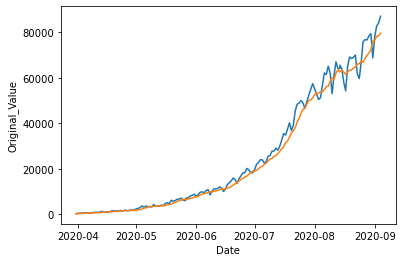

In [5]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-2], dc['original_val'][:len(dc)-2])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-2], dc['mean_based'][:len(dc)-2])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

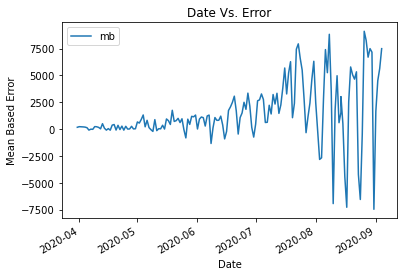

In [26]:
errdf[:len(errdf)-2].plot(x="date",y="mb")
plt.xlabel("Date")
plt.ylabel("Mean Based Error")
plt.title("Date Vs. Error")


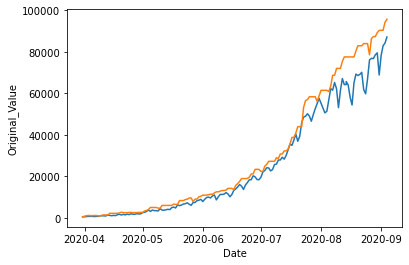

In [17]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-2], dc['original_val'][:len(dc)-2])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-2], dc['max_based'][:len(dc)-2])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

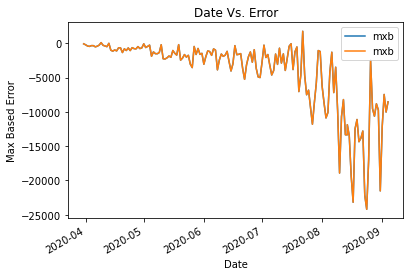

In [25]:
errdf[:len(errdf)-2].plot(x="date",y="mxb")
plt.xlabel("Date")
plt.ylabel("Max Based Error")
plt.title("Date Vs. Error")


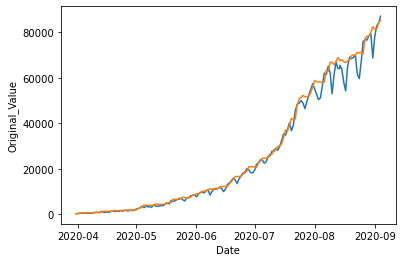

In [20]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-2], dc['original_val'][:len(dc)-2])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-2], dc['mean_max_based'][:len(dc)-2])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

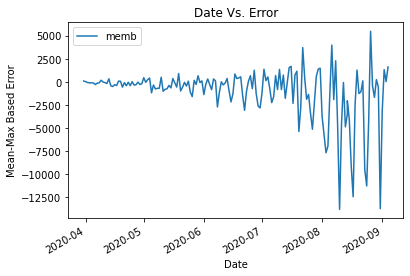

In [24]:
errdf[:len(errdf)-2].plot(x="date",y="memb")
plt.xlabel("Date")
plt.ylabel("Mean-Max Based Error")
plt.title("Date Vs. Error")


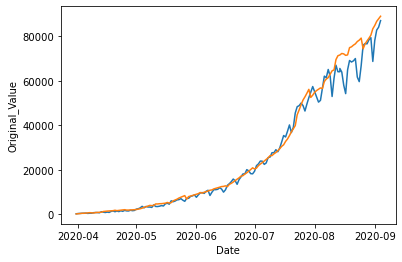

In [28]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-2], dc['original_val'][:len(dc)-2])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-2], dc['max_mean_based'][:len(dc)-2])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

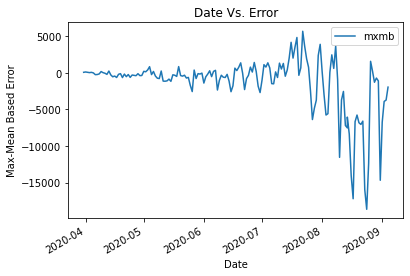

In [30]:
errdf[:len(errdf)-2].plot(x="date",y="mxmb")
plt.xlabel("Date")
plt.ylabel("Max-Mean Based Error")
plt.title("Date Vs. Error")


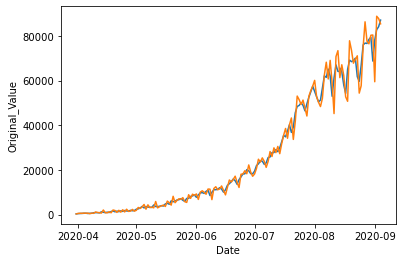

In [29]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-2], dc['original_val'][:len(dc)-2])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-2], dc['last_based'][:len(dc)-2])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

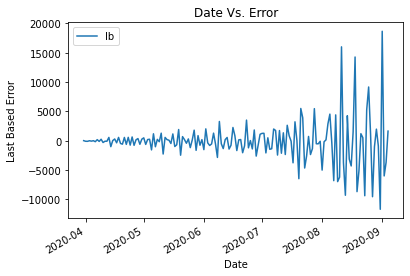

In [31]:
errdf[:len(errdf)-2].plot(x="date",y="lb")
plt.xlabel("Date")
plt.ylabel("Last Based Error")
plt.title("Date Vs. Error")


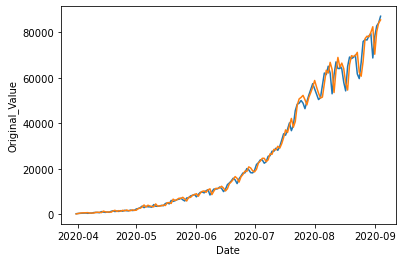

In [32]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-2], dc['original_val'][:len(dc)-2])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-2], dc['mean_last_based'][:len(dc)-2])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

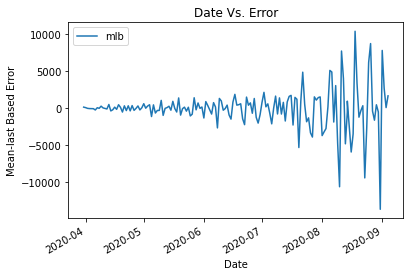

In [35]:
errdf[:len(errdf)-2].plot(x="date",y="mlb")
plt.xlabel("Date")
plt.ylabel("Mean-last Based Error")
plt.title("Date Vs. Error")


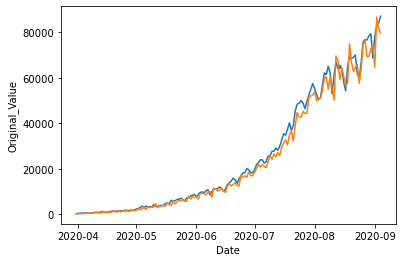

In [36]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-2], dc['original_val'][:len(dc)-2])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-2], dc['last_mean_based'][:len(dc)-2])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

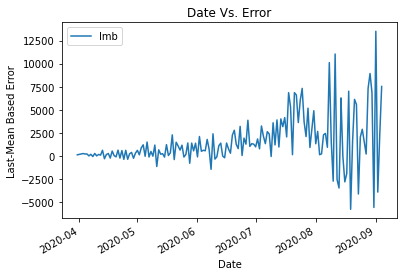

In [37]:
errdf[:len(errdf)-2].plot(x="date",y="lmb")
plt.xlabel("Date")
plt.ylabel("Last-Mean Based Error")
plt.title("Date Vs. Error")


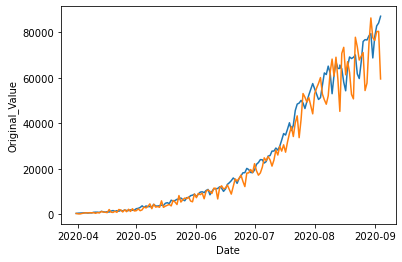

In [38]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-2], dc['original_val'][:len(dc)-2])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-2], dc['middle_based'][:len(dc)-2])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

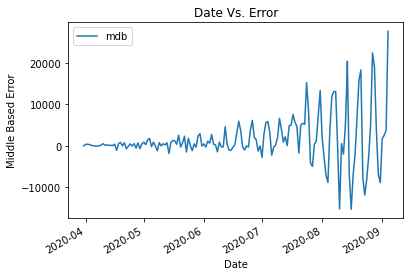

In [39]:
errdf[:len(errdf)-2].plot(x="date",y="mdb")
plt.xlabel("Date")
plt.ylabel("Middle Based Error")
plt.title("Date Vs. Error")


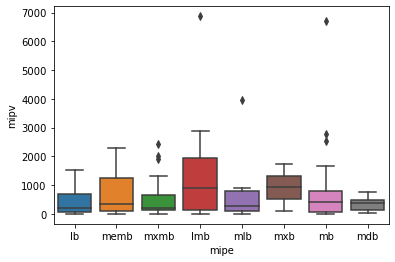

In [66]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv)

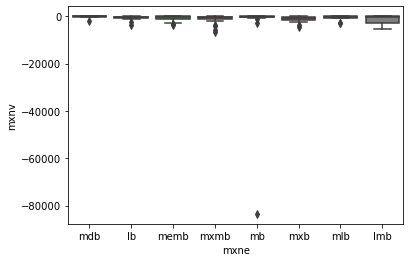

In [76]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)